In [33]:
import numpy as np
import pandas as pd
import scipy

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Methods implementation

### Kernels

In [71]:
def kernel(w, x, type='linear', sigma=1, r=0, d=1):
    if type == 'linear':
        return np.dot(w,x)
    
    elif type == 'polynomial':
        return (sigma * np.dot(w,x) + r) ** d
    
    elif type == 'radial':
        return exp(- sigma * np.linalg.norm(w - x) ** 2)
    
    else:
        print('error: incorrect kernel type')
        return
    return 

### SVM (Support Vector Machines)

In [105]:
def M(y, x, w, w0, kernel_type, sigma, r, d):
    return y * (kernel(w, x, kernel_type) - w0) 

def ksi(y, x, w, w0, kernel_type, sigma, r, d):
    return max(0,1 - M(y, x, w, w0, kernel_type, sigma, r, d))

def support_vector_machines_classifier(X, y, w_init=None, C=1,
                   kernel_type='linear', sigma=1, r=0, d=1):
    if(w_init == None):
        w_init = np.zeros(X.shape[1] + 1)
        
    hinge_loss = lambda w: np.array([ksi(y[i], X[i], w[1:], w[0],
                                         kernel_type, sigma, r, d)
                                     for i in range(len(y))]).sum()
    
    regularization = lambda w: kernel(w[1:], w[1:], kernel_type, sigma, r, d) / (2 * C)
    
    w = scipy.optimize.minimize(lambda w: hinge_loss(w) + regularization(w), w_init).x
    return w

def support_vector_machines_prediction(w, X, kernel_type='linear', sigma=1, r=0, d=1):
    return np.array([sign(kernel(x, w[1:], kernel_type, sigma, r, d)) for x in X - w[0]])

# Quality check

In [13]:
def accuracy(y, y_pred):
    return np.where(y - y_pred == 0)[0].size / len(y)

#  Visualizing algorithms results

In [14]:
def plot_2f_dataset(data, labels, colors=None): 
    from numpy.random import rand
    data = np.array(data)
    labels = np.array(labels)
    n = len(set(labels))
    if(colors == None):
        colors = ListedColormap([tuple(rand(3)) for i in range(n)])
    pyplot.figure(figsize(5, 5))
    pyplot.scatter(data[:,0], data[:,1], c = labels, cmap = colors)
    plt.show()

In [15]:
def print_result(true, predict, cut = 5):
    #print('w:\n',coef,'\n')
    if len(true) > cut:
        nl = '\n...\n'
    else:
        nl = '\n'
    print('true vs. prediction:\n',np.vstack((true,predict)).T[:cut],nl)
    print('accuracy: ',round(accuracy(true, predict),3))

# Data

### Generate dataset

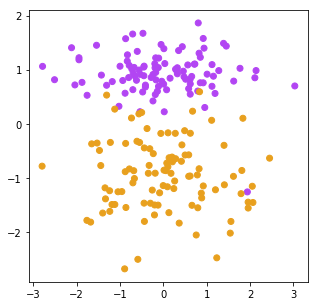

In [93]:
from sklearn import datasets

sample_size = 200
data, target = datasets.make_classification(n_samples=sample_size, n_features=2, 
                                            n_informative=1, n_redundant=0, 
                                            n_repeated=0, n_classes=2, 
                                            n_clusters_per_class=1, 
                                            weights=None, flip_y=0.01, 
                                            class_sep=1.0, hypercube=True, 
                                            shift=0.0, scale=1.0, 
                                            shuffle=True, random_state=1)
target[target == 0] = -1

plot_2f_dataset(data, target)

### Split dataset into train & test samples

In [95]:
from sklearn import cross_validation as cross_val

train_data, test_data, \
train_labels, test_labels = cross_val.train_test_split(data, target,
                                                       test_size = 0.3)

In [32]:
print('train_data: \n',train_data[:5],'\n...\n')
print('train_labels: \n',train_labels[:5],'...')

train_data: 
 [[ 0.585662   -0.57237583]
 [-0.44317193 -1.46434362]
 [-1.1191154   0.27189599]
 [-1.75592564  0.5278147 ]
 [ 0.50274088 -0.57515169]] 
...

train_labels: 
 [0 0 0 1 0] ...


### Run model and output

true vs. prediction:
 [[-1. -1.]
 [ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [-1.  1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]] 
...

accuracy:  0.967


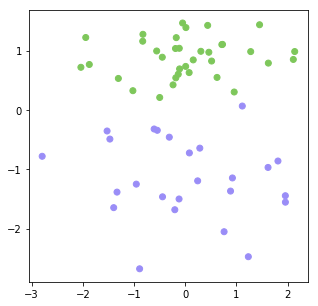

In [117]:
w_init = None
C = 2
kernel_type = 'polynomial'
sigma = 2
r = 2
d = 1

w = support_vector_machines_classifier(train_data, train_labels, w_init, C, kernel_type, sigma, r, d)
test_labels_predict = support_vector_machines_prediction(w, test_data, kernel_type, sigma, r, d)

print_result(test_labels, test_labels_predict, cut = 10)
if train_data.shape[1] == 2 and (train_data.dtype.type == np.float64
                                 or train_data.dtype.type == np.int64):
    #plot_2f_dataset(train_data, train_labels_predict)
    plot_2f_dataset(test_data, test_labels_predict)

### sklearn.cluster.SVM for check

true vs. prediction:
 [[-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]] 
...

accuracy:  0.967


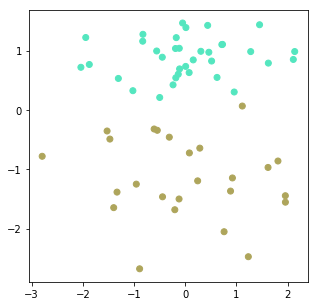

In [118]:
from sklearn import svm

SVM_classifier = svm.LinearSVC()
SVM_classifier.fit(train_data,train_labels)
print_result(test_labels, SVM_classifier.predict(test_data))
if train_data.shape[1] == 2 and (train_data.dtype.type == np.float64
                                 or train_data.dtype.type == np.int64):
    #plot_2f_dataset(train_data, SVM_classifier.predict(train_data))
    plot_2f_dataset(test_data, SVM_classifier.predict(test_data))